### 9.2 이산 푸리에 변환

푸리에 변환 : 신호나 영상을 주파수 영역으로 변환하는 일반적인 방법

- 전제 : 주기를 가진 신호는 정현파/여현파의 합으로 표현 가능

- 정현파/여현파 : 모든 파형중에 가장 순수한 파형 (sin, cos)



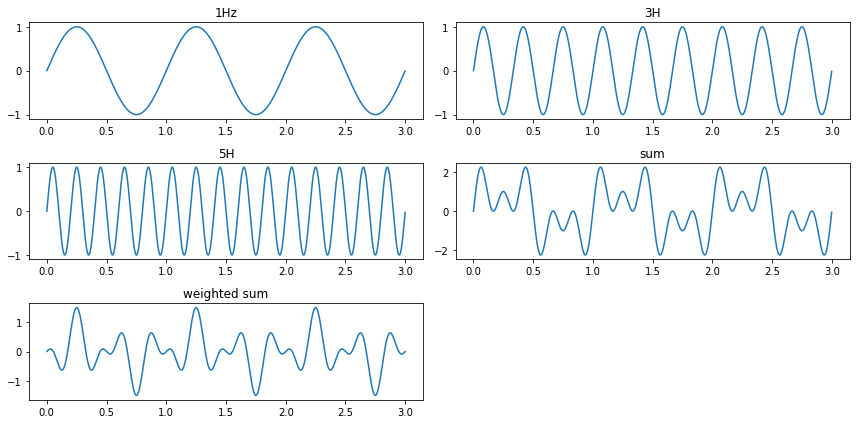

In [4]:
# 9.2.1 이산 푸리에 변환
import matplotlib.pyplot as plt
import numpy as np

t = np.arange(0, 3, 0.001) # 샘플링 범위 및 간격
g = [0] * 5
g[0] = np.sin(2 * np.pi * t)
g[1] = np.sin(2 * np.pi * t * 3)
g[2] = np.sin(2 * np.pi * t * 5)
g[3] = g[0] + g[1] + g[2] # 신호를 균등하게 합함
g[4] = 0.3 * g[0] - 0.7 * g[1] + 0.5 * g[2] # 각 신호의 비율을 변경하여 합함

titles = ['1Hz', '3H', '5H', 'sum', 'weighted sum']
plt.figure(figsize=(12, 6))
for i, title in enumerate(titles):
    plt.subplot(3, 2, i+1), plt.plot(t, g[i]), plt.title(title)
plt.tight_layout() # 여백 설정
plt.show()

In [ ]:
# 9.2.2 이산 푸리에 변환
import matplotlib.pyplot as plt, math
import numpy as np

def exp(knN):
    th = -2 * math.pi *knN # 푸리에 변환 각도값
    return complex(math.cos(th), math.sin(th))

def dft(g):
    N = len(g)
    dst = [sum(g[n] * exp(-k*n/N) for n in range(N)) for k in range(N)]
    return np.array(dst)

def idft(g):
    N = len(g)
    dst = [sum(g[n] * exp(-k*n/N) for n in range(N)) for k in range(N)]
    return np.array(dst)/N

fmax = 1000
dt = 1/fmax
t = np.arange(0, 1, dt)

g1 = np.sin(2 * np.pi * 50 * t)
g2 = np.sin(2 * np.pi * 120 * t)
g3 = np.sin(2 * np.pi * 260 * t)
g = g1 * 0.6 + g2 * 0.9 + g3 * 0.2

N = len(g)
df = fmax/N
f = np.arange(0, N, df)
xf = dft(g) * dt
g2 = idft(xf)/dt
plt.figure(figsize=(10, 20))
plt.subplot(3, 1, 1), plt.plot(t[0:200], g[0:200]), plt.title('org signal')
plt.subplot(3, 1, 2), plt.plot(f, np.abs(xf)), plt.title('dft ampitude')
plt.subplot(3, 1, 3), plt.plot(t[0:200], g[0:200]), plt.title('idft signal')


